<a href="https://colab.research.google.com/github/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/HyperDimensionalComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperdimensional Computing Accelerator with Openlane for Visual Scene Understanding

```
Copyright 2024 SiliconJackets @ Georgia Institute of Technology
SPDX-License-Identifier: GPL-3.0-or-later
```

Hyperdimensional computing accelerator for visual scene understanding through the fatorization of symbolic vector representations inpsired by [1](https://www.nature.com/articles/s41565-023-01357-8#Sec1) and [2](https://direct.mit.edu/neco/article/32/12/2311/95651/Resonator-Networks-1-An-Efficient-Solution-for) using the [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/) RTL to GDS flow targeting the [open source SKY130 PDK](https://github.com/google/skywater-pdk/).

|Name|Affiliation| Email |IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|:----------:|
|Jack Cochran|Georgia Institute of Technology|jcochran66@gatech.edu|No|No|
|Sowmya Janapati|Georgia Institute of Technology|jsowmya@gatech.edu|No|No|
|Minseung Jung|Georgia Institute of Technology|mjung76@gatech.edu|No|No|
|Jackie MacHale|Georgia Institute of Technology|jackiemachale@gatech.edu|No|No|
|Nealson Li|Georgia Institute of Technology|nealson@gatech.edu|Yes|Yes|
|Zachary Ellis|Georgia Institute of Technology|zellis7@gatech.edu|Yes|Yes|

Solving Raven's Progressive Matrices relies on Visual Scene Understanding, but traditional neural networks are costly and data-intensive. Hyperdimensional Computing offers a faster, more efficient alternative, necessitating specialized hardware for optimal performance.

This notebook outlines the design specification, simulation, and implementation of a Hyperdimensional Computing Resonator Network Accelerator using open-source tools and PDKs. This project explains the principles behind using hyperdimensional computing in Resonator Networks for factorization in scene understanding, demonstrates the performance of our implementation with visual results, and showcases the final GDS generated using an open-source design flow. By providing a reusable design, this notebook aims to contribute to the hardware open-source community and advance efficient hyperdimensional computing applications.

This submission was completed by members of SiliconJackets, a student-run organization at Georgia Tech that introduces students to semiconductor design, verification, and implementation through large collaborative projects. We hope this notebook serves as a valuable example for future club members.



<!-- In this notebook we will be going through the process of design specification, simulation, and implementation for a resource constrained design intended to submitted to another open source silicon initiative [Tiny Tapeout](https://tinytapeout.com/). Tiny tapeout allows individuals to purchase tiny 160um x 100um blocks on a silicon die for an acceptable price in order to gain exposure to the semiconductor deisng process. Our plan is to create a hardware accelerator for Convolutional Neural Networks \(CNNs\), losely based on the design from [EYERISS](https://courses.cs.washington.edu/courses/cse550/21au/papers/CSE550.Eyeriss.pdf) for the purpose of recognizing hardwritten numbers. This project will demonstrate the principles behind how a systolic array operates for doing 2D convolution operators, demonstrate the performance of our implementation, and show how the final design can fit within *a few* tiny tapeout blocks. -->


<!-- From the github page

1. Promote reproducible chip design using open-source tools and notebook-driven design flows and
2. Enable up-and-coming talents as well as seasoned open-source enthusiasts to travel to IEEE SSCS conferences and interact with the leading-edge chip design community.

Applicants must submit an open-source Jupyter notebook detailing an innovative circuit design using open-source tools. The objective is to disseminate the main ideas and design choices using open-source tools and PDKs in a reproducible manner. Generating a final layout of your circuit is encouraged but not required. -->


## Introduction
---


In this notebook, we first introduce hyperdimensional computing and Raven's Progressive Matrices, referencing the Neuro-Symbolic Architecture and Resonator Network presented in [1](https://www.nature.com/articles/s41565-023-01357-8#Sec1) and [2](https://direct.mit.edu/neco/article/32/12/2311/95651/Resonator-Networks-1-An-Efficient-Solution-for), which loosely inspire our design. Next, we detail the hardware specifications and the design of the high-level architecture and processing unit. We then demonstrate the performance of our hardware by simulating it to perform symbolic vector factorization for a visual scene understanding task and verify the results against the software golden reference. Finally, the hyperdimensional computing accelerator is implemented using the [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/) RTL to GDS flow with the open-source [SKY130 PDK](https://github.com/google/skywater-pdk/).

## Hyperdimensional Computing (HDC)
---

### What is Hyperdimensional Computing (HDC)?

Hyperdimensional (HD) computing is a brain-inspired computing paradigm that utilizes high-dimensional vectors to represent and process information. In this approach, data is encoded into holographic vectors, typically with dimensions in the thousands, where information is distributed equally across all vector components. These high-dimensional representations exhibit quasi-orthogonality, meaning that randomly generated vectors are likely to be nearly orthogonal to each other. HD computing supports a rich set of algebraic operations that preserve dimensionality, allowing for efficient manipulation and combination of encoded information. This computational model is particularly useful for tasks such as sensory perception, cognitive reasoning, and factorization of complex representations.

The key algebraic operations in HD computing are:

*   **Binding:** This operation combines multiple attribute vectors to create a unique product vector. Binding is achieved through element-wise multiplication of bipolar ({-1, +1}^D) vectors representing different attributes
. For example, an object with F attributes is described by multiplying F D-dimensional holographic bipolar vectors, resulting in a single product vector of the same dimensionality.

*   **Unbinding:** This is the inverse operation of binding, used to separate the constituent factors from a product vector. In bipolar space, unbinding is also performed via element-wise multiplication.

*   **Similarity calculation:** This operation computes the similarity between vectors, typically using dot products. This is implemented as a matrix-vector multiplication (MVM) operation

*   **Projection:** This operation projects a vector onto the space of possible solutions for a given factor. This is implemented as a transposed matrix-vector multiplication.



### Visual Scene Understanding with HDC
Raven’s Progressive Matrices (RPM) challenge systems to analyze and extract relationships between geometric features, testing their ability to reason visually. Solving RPM is a cornerstone of artificial intelligence research, with Visual Scene Understanding serving as a critical first step in this process. While traditional neural networks have been the dominant approach, they often suffer from limitations such as high computational costs and dependence on large training datasets. Hyperdimensional Computing (HDC) presents a more efficient and robust alternative, but realizing its full potential requires specialized hardware.

#### Raven's Progressive Matrices (RPM)
Raven's Progressive Matrices are puzzles that require identifying patterns and relationships between geometric figures based on attributes such as shape, color, position, and transformations. While traditionally used to assess human intelligence, these puzzles have gained significance in the era of artificial intelligence. Solving them effectively demonstrates a machine's capacity for visual and geometric reasoning. A critical first step for the machine to solve this puzzle is to accurately interpret each image before identifying relationships among the eight pictures. For instance, in the figure below, the machine must recognize that the top-left image depicts a *green* *square* located at the *top-left* corner. This process of understanding and reasoning is highly challenging for AI systems and highlights the complexity of visual geometric reasoning.

<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/rpm.jpg?raw=1" width="1000"/>
</div>

#### Why HDC for Visual Scene Understanding?
Visual scene understanding—interpreting relationships like color, shape, and position of objects in a scene—is a challenging task for traditional AI approaches. Neural networks, the most common method, face several limitations:

* **High Data Requirements**: Neural networks need large training datasets to generalize effectively.
* **Computational Inefficiency**: They require significant computational power for both training and inference.
* **Sensitivity to Noise**: Neural networks often struggle with noisy or incomplete inputs.

Hyperdimensional Computing HDC offers a robust and efficient alternative, addressing these limitations with its unique properties:

* **Compact Representations**: HDC encodes complex relationships, such as "a blue square at the center," into a single, high-dimensional vector. This means multiple attributes (e.g., color, shape, and position) are stored together in a way that simplifies processing and avoids the need for separate analysis pipelines. This compactness is crucial for efficient computation and storage.

* **Efficiency**: Unlike neural networks, which rely on extensive datasets for training, HDC can achieve accurate reasoning with minimal data. It leverages its structured encoding of information to perform pattern recognition and reasoning with far fewer examples, reducing the time and computational cost associated with training.

* **Robustness**: HDC's inherent resilience to noise and errors ensures reliable performance in dynamic or unpredictable environments. For instance, even if parts of the input data are corrupted or incomplete, HDC can still decode the correct relationships from the hypervector, making it ideal for real-world applications where perfect data is rare.

These advantages make HDC particularly well-suited for visual scene understanding, especially in applications requiring real-time analysis of geometric features and their interactions, such as Raven's Progressive Matrices test.


<!--
> TODO - What are the limitations of current approaches

> TODO - What properties HDC has solve this

 Traditional AI methods like neural networks struggle with Visual Scene Understanding due to high training data requirements and computational inefficiency. Hyperdimensional Computing offers a robust and efficient alternative for such tasks in several ways.

1.   Compact Representations: Encodes relationships (e.g., "blue square at the center") in a single, high-dimensional vector.
2.   Efficiency: Avoids the need for large datasets required by neural networks.
3.   Robustness: Resistant to noise and errors. -->


#### Resonator Network for Factorization
 <!-- > Visual Scene Understanding as a Factorization Problem -->

To solve RPM, a Neuro-Symbolic Architecture is proposed in [2](https://direct.mit.edu/neco/article/32/12/2311/95651/Resonator-Networks-1-An-Efficient-Solution-for), as illustrated in the figure below. This architecture consists of an encoder-decoder framework. The encoder, a convolutional neural network (Neural), encodes the input image into a symbolic vector, while the decoder, an HDC resonator network (Symbolic), decodes this vector into the image's features. Solving RPM using HDC requires the encoded symbolic vector to undergo a process called factorization, which the Resonator Network efficiently performs.


How Resonator Network Works:
1.   Input: A sybolic vector representing the input image.
2.   Process: Resonator Network iteratively refines guesses using HDC operations until the correct features are extracted (e.g., “green square at top-left”).

$$\hat{s}(t+1) = f_{\text{bipolar}}(\mathbf{SS}^\top \times (a\space\odot\space\hat{c}(t)\space\odot\space\hat{p}(t)))\space\space$$

$$\hat{c}(t+1) = f_{\text{bipolar}}(\mathbf{CC}^\top \times (a\space\odot\space\hat{s}(t)\space\odot\space\hat{p}(t)))$$

$$\hat{p}(t+1) = f_{\text{bipolar}}(\mathbf{PP}^\top \times (a\space\odot\space\hat{s}(t)\space\odot\space\hat{c}(t)))$$

3.   Output: Individual image features such as color, shape, horizontal position, and vertical position.

The Resonator Network relies on HDC operations like binding (combining features), bundling (compressing multiple vectors), and similarity search (comparing vectors). Accelerating these HDC operations and Resonator Network is a critical focus of this notebook, as they form the backbone of Neuro-Symbolic Architecture for solving RPM.

<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/nsa_a.jpg?raw=1" width="1000"/>
</div>


#### Why HDC hardware acceleration?

While Hyperdimensional Computing provides significant advantages for tasks like visual scene understanding, its computational operations—such as binding, bundling, and similarity search—are inherently resource-intensive when implemented on traditional hardware like CPUs and GPUs. These platforms are optimized for dense matrix computations, not the sparse, parallel, high-dimensional arithmetic that HDC requires. As a result, HDC operations on these architectures are slow and inefficient, making real-time performance impractical for applications requiring rapid and continuous processing. HDC hardware acceleration addresses these challenges by designing specialized architectures optimized for high-dimensional vector operations. These accelerators enable parallel processing, custom memory access for hypervectors, and energy-efficient arithmetic, significantly reducing computation time and power consumption. With HDC hardware acceleration, applications like visual scene understanding, real-time pattern recognition, and reasoning become feasible at scale, allowing the full potential of HDC for real-world usage.

<!-- > Unfortunately, these operations are slow and resource-intensive on conventional CPUs and GPUs. -->

### How is the hardware designed?

> TODO
<!-- In order to show off the high memory efficiency of row stationary dataflow, the external memory connections for the top level of this design are very limited. With 2 read ports and 1 write port, this design is only able to read in 16 bits of data each cycle and write 8 bits. However, this data is reused across PEs allowing up to 9 MACs a cycle with different data combinations. -->
<!--
<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/top.jpg?raw=1" width="1000"/>
</div> -->

<!-- ![Flow](https://github.com/SiliconJackets/sscs-ose-code-a-chip.github.io/blob/main/VLSI24/submitted_notebooks/SJSystolicArray/img/Top.png?raw=true){: width=250} -->

#### Top Level Design

> TODO

<!-- The top-level controller is responsible for controlling the timing of data read and operation start for all the PEs. Taking in the size of the input from the memory interface on the first cycle, the top-level controller then schedules the control signals for the individual PEs to read the data on the memory bus when it is their turn. When a PE has the data it needs, and it is it's turn in the sequence to start it's 1D convolution, the top-level controller asserts the start signal for that PE. Because of the staggering of start times, the state machines inside the PEs will run such that the data is automatically summed up the column of the PE and only one result is available for writing at a time. -->


<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/top.jpg?raw=1" width="1000"/>
</div>

<!-- ![Flow](https://github.com/SiliconJackets/sscs-ose-code-a-chip.github.io/blob/main/VLSI24/submitted_notebooks/SJSystolicArray/img/Ctrl.png?raw=true){: width=250} -->

#### Module Design

##### **Pre-Bind Stage**

> TODO

<!-- In order to reduce complexity and area the control structure inside each PE is kept very simple. When the PE sees a control signal to read in a new input or filter value from the top-level controller, it will read in a new value into the scratchpad and shift existing values over evicting the oldest value (with a depth of 3). Once the PE sees a start signal it will spend 3 cycles doing MACs with the scratchpad values and then sum with the input psum. With the PE start signals staggered across the array, the psum_o for one PE in a column becomes psum_i for the PE above it with the top PE presenting a final value at the output. These PEs always rely on the correct data being present at the correct time which is possible with the scheduling of the memory transactions and top-level controller. -->

<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/prebind.jpg?raw=1" width="1000"/>
</div>

##### **Factor Feature**

> TODO

<!-- In order to reduce complexity and area the control structure inside each PE is kept very simple. When the PE sees a control signal to read in a new input or filter value from the top-level controller, it will read in a new value into the scratchpad and shift existing values over evicting the oldest value (with a depth of 3). Once the PE sees a start signal it will spend 3 cycles doing MACs with the scratchpad values and then sum with the input psum. With the PE start signals staggered across the array, the psum_o for one PE in a column becomes psum_i for the PE above it with the top PE presenting a final value at the output. These PEs always rely on the correct data being present at the correct time which is possible with the scheduling of the memory transactions and top-level controller. -->

<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/feactorfeat.jpg?raw=1" width="1000"/>
</div>

## Simulation
---

### Visual Scene Understanding with Resonator Network HDC accelerator
<!-- Explain convolving the input image with sobel filter emhances the edge of the objects, and the convolution can be accelerated by the Systolic array. -->


To demonstrate our HDC accelerator's capability to enhance the performance of the Resonator Network, we focus on visual scene understanding, which involves factorizing the input image encoded as a symbolic vector.

We implemented the Resonator Network in Python as a golden reference to verify the functionality of our HDC accelerator design and to serve as a baseline for comparison. Additionally, we developed a dedicated codebook generator to produce orthogonal vector representations for each feature. A 32-bit symbolic vector, representing the input, is processed by both the hardware and software implementations of the Resonator Network, undergoing multiple iterations of factorization until convergence. This process demonstrates how the network iteratively identifies the correct shape, color, and position, showcasing its ability to interpret visual scenes. Finally, we compare the runtimes of the software and hardware implementations to highlight the performance gains achieved by our hardware accelerator.

The demonstration follows these steps:

1. Install the software dependencies.
2. Download the Python and Verilog files of our design.
3. Run the Resonator Network in both software and hardware.
4. Illustrate the convergence process.
5. Compare the performance of the software and hardware implementations.

We begin with the example of a bottom-right red circle. Following this, you can select any of the 36 possible visual scenes to test the hardware accelerator's performance, observe the convergence process, and evaluate its ability to accelerate the Resonator Network while interpreting visual scenes.


<!--
Explain image size, show original image.

Explain the following experiment steps -->

In [76]:
#@title Install Dependencies {display-mode: "form"}
#@markdown Click the ▷ button to setup the simulation environment.

#@markdown Main components we will install

#@markdown *   verilator : a free and open-source software tool which converts Verilog (a hardware description language) to a cycle-accurate behavioral model in C++ or SystemC.
#@markdown *   Numpy: a convenient python library for matrix operations
%load_ext autoreload
%autoreload 2
!apt-get install verilator
!pip install numpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
verilator is already the newest version (4.038-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [84]:
%%capture

#@title Download HDC Files

#@markdown Click the ▷ button to download the rtl files.
#@markdown The files will be downloaded to the HDCompute directory
#@markdown the file structure is described below:

#@markdown * HDCompute/src/
#@markdown    *  python/
#@markdown       *   `HDcomp.py` : python implementation of the resonator network
#@markdown       *   `codebooks.npy` : NumPy binary file that stores predefined codebooks for encoding features such as color, shape, and position
#@markdown    *  verilog/
#@markdown       *   `res_net_top.sv` : Implements the top level integration for each of the feature factorizer
#@markdown       *   `factor_feature.sv` : Implements the convergence logic
#@markdown       *   `feature_bind.sv` : Implements the binding operation
#@markdown       *   `mem_clean_up.sv` : Implements similarity and projection operations (MVM)
#@markdown       *   `bipolar_sum_tree.sv` : Required for Matrix vector multiplication

%cd /content/
!rm -rf HDCompute
!git clone https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing.git HDCompute
!mv HDCompute/src/python/* HDCompute
%cd /HDCompute/


In [89]:
%%capture

#@title Compile Verilator Testbench

#@markdown Click the ▷ button to compile the rtl files.

%cd /content/
!rm -rf obj_dir
!verilator -Wno-WIDTHEXPAND --trace --cc HDCompute/src/verilog/res_net_pkg.svh HDCompute/src/verilog/res_net_top.sv HDCompute/src/verilog/feature_bind.sv HDCompute/src/verilog/factor_feature.sv HDCompute/src/verilog/mem_clean_up.sv HDCompute/src/verilog/bipolar_sum_tree.sv --exe HDCompute/src/tb.cpp
!make -C obj_dir -f Vres_net_pkg.mk

In [90]:
%cd /content/obj_dir/
!./Vres_net_pkg

/content/obj_dir
converged 7 cycles


### Run Resonator Network in both Software and Hardware

In [91]:
#@markdown Click the ▷ button to view the example visual scene

#@markdown There are 36 possible visual scenes, determined by the combinations of 3 shapes, 3 colors, and 4 positions:

#@markdown * Shapes: Square, Triangle, Circle
#@markdown * Colors: Green, Red, Blue
#@markdown * Positions: Top-Left, Top-Right, Bottom-Left, Bottom-Right

#@markdown For this example, we selected a red circle positioned in the bottom-right corner. The input image and the bitmap representation of the symbolic vector are illustrated below. The symbolic vector is a 32-bit representation that encodes the shape, color, and position information of the input image.


import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import VBox, HBox
import numpy as np

# Dropdowns for selecting attributes
description_style = {
    'description_width': '50px',
    'description_align': 'left'
}
shape_dropdown = widgets.Dropdown(
    options=['Square', 'Circle', 'Triangle'],
    value='Circle',
    description='Shape:',
    style=description_style
)

color_dropdown = widgets.Dropdown(
    options=['Red', 'Blue', 'Green'],
    value='Red',
    description='Color:',
    style=description_style
)

position_dropdown = widgets.Dropdown(
    options=['Top Left', 'Top Right', 'Bottom Left', 'Bottom Right'],
    value='Bottom Right',
    description='Position:',
    style=description_style
)

# Function to map the position dropdown to actual coordinates on the screen
def get_position(position):
    positions = {
        'Top Left': (0.25, 0.75),
        'Top Right': (0.75, 0.75),
        'Bottom Left': (0.25, 0.25),
        'Bottom Right': (0.75, 0.25)
    }
    return positions[position]

# Define muted colors
muted_colors = {
    'Red': (0.7, 0.2, 0.2, 1.0),
    'Blue': (0.35, 0.55, 0.9, 1.0),
    'Green': (0.25, 0.6, 0.25, 1.0)
}

# Function to draw a shape
def draw_shape(shape, color, position):
    x, y = get_position(position)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_facecolor('white')
    ax.axis('off')

    selected_color = muted_colors[color]
    if shape == 'Square':
        ax.add_patch(plt.Rectangle((x - 0.2, y - 0.2), 0.4, 0.4, facecolor=selected_color, edgecolor='black'))
    elif shape == 'Circle':
        ax.add_patch(plt.Circle((x, y), 0.2, facecolor=selected_color, edgecolor='black', lw=1))
    elif shape == 'Triangle':
        triangle = plt.Polygon(
            ((x - 0.2, y - 0.2), (x + 0.2, y - 0.2), (x - 0.2, y + 0.2)),
            facecolor=selected_color,
            edgecolor='black'
        )
        ax.add_patch(triangle)

    plt.show()

# Generate position vectors (quasi-orthogonal binary vectors)
def generate_random_binary_vector(size=32):
    return np.random.choice([1, -1], size=size)

def rotate_right(vector, n):
    return np.roll(vector, n)

def generate_position_vectors(num_positions, size=32):
    vectors = []
    for _ in range(num_positions):
        vec = generate_random_binary_vector(size)
        for existing_vec in vectors:
            while np.abs(np.dot(vec, existing_vec)) > size // 4:
                vec = generate_random_binary_vector(size)
        vectors.append(vec)
    return np.array(vectors)

with open('/content/HDCompute/codebooks.npy', 'rb') as codefd:
        Xt = np.load(codefd)
        Yt = np.load(codefd)
        Zt = np.load(codefd)
positions = ['Top Left', 'Top Right', 'Bottom Left', 'Bottom Right']
colors = ['Red', 'Blue', 'Green']
shapes = ['Circle', 'Square', 'Triangle']

position_vectors = {positions[i]: Zt[i] for i in range(Zt.shape[0])}
color_vectors = {colors[i]: Xt[i] for i in range(Xt.shape[0])}
shape_vectors = {shapes[i]: Yt[i] for i in range(Yt.shape[0])}

def generate_combined_vector(shape, color, position):
    return shape_vectors[shape] * color_vectors[color] * position_vectors[position]

def display_bitmap(vector):
    # Reshape the 32-element vector into a 4x8 matrix
    bitmap = np.array(vector).reshape((4, 8))

    # Map -1 to grey (0.5) and 1 to white (1.0)
    bitmap_color = (bitmap + 1) / 2  # Converts -1 -> 0 and 1 -> 1

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(6, 3))

    # Draw the squares
    for i in range(bitmap.shape[0]):  # Rows
        for j in range(bitmap.shape[1]):  # Columns
            color = 'white' if bitmap_color[i, j] == 1 else  (0.3, 0.3, 0.3)
            rect = plt.Rectangle(
                (0.8+0.8*j,0.4+0.8*( bitmap.shape[0] - i - 1)),  # Place square at correct position
                0.8, 0.8,  # Width and height of the square
                facecolor=color, edgecolor='black'
            )
            ax.add_patch(rect)

    # Set limits and aspect
    ax.set_xlim(0, bitmap.shape[1])
    ax.set_ylim(0, bitmap.shape[0])
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes for a cleaner display

    # Add title
    plt.title("Bitmap Representation of Binded vector")
    plt.show()

# Wrapper function to handle shape drawing
def update_shape(shape, color, position):
    draw_shape(shape, color, position)

# Wrapper function to handle bitmap display
def update_bitmap(shape, color, position):
    combined_vector = generate_combined_vector(shape, color, position)
    display_bitmap(combined_vector)

# Create separate output widgets for shape and bitmap
shape_output = widgets.interactive_output(update_shape, {'shape': shape_dropdown, 'color': color_dropdown, 'position': position_dropdown})
bitmap_output = widgets.interactive_output(update_bitmap, {'shape': shape_dropdown, 'color': color_dropdown, 'position': position_dropdown})

# Create HBox for the shape and bitmap with a gap between the two outputs
shape_vbox = VBox([shape_output], layout=widgets.Layout(margin='30px 30px 0 0'))  # Add gap to the right of the shape output
bitmap_vbox = VBox([bitmap_output], layout=widgets.Layout(margin='20px 0 0 0'))  # No gap on the bitmap side

# Create HBox to arrange the two VBox widgets
visuals = HBox([shape_vbox, bitmap_vbox])

# Create the widgets layout on top
controls = VBox([shape_dropdown, color_dropdown, position_dropdown])

# Display the widgets and output side by side
display(visuals)
# display(VBox([controls, visuals]),layout=widgets.Layout(align_items="center"))

In [92]:
#@markdown Click the ▷ button to run the simulation

#@markdown Using HDComp.py, we run an image through a software only version of the edge detection algorithm to get a golden reference. We also plot the progression of the similarity between the predicted factors and the factors in the code book as the network iterates until convergence is reached

%cd /content/HDCompute/
from HDComp import *
import matplotlib.gridspec as gridspec
vecSize = 32
maxIter = 100
chosen_color = 'red'
chosen_shape = 'circle'
chosen_position = 'bottomright'

history = run_single_case(vecSize, maxIter, chosen_color, chosen_shape, chosen_position)


/content/HDCompute


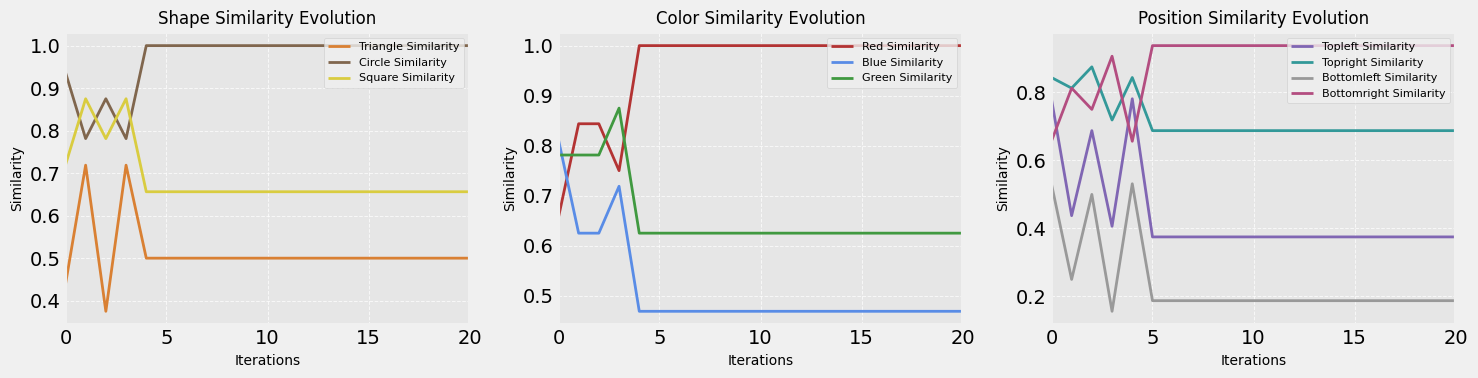

In [93]:
#@title Results

#@markdown Click the ▷ button to show the results

#@markdown Our input scene consisted of a red circle located in the bottom-right corner. The initial fluctuations in the plots represent the resonator network's process of convergence. As the network stabilizes, the graphs level off, indicating that convergence has been achieved.

#@markdown * In the Shape Similarity Evolution plot, the resonator network successfully identified the shape as a ***Circle***.

#@markdown * In the Color Similarity Evolution plot, it accurately determined the color as ***Red***.

#@markdown * In the Position Similarity Evolution plot, the network concluded the position as ***Bottom-right***.

#@markdown This demonstrates the network's ability to accurately analyze and converge on the input scene's attributes.


# code for displaying multiple images in one figure

def plot_graph_new(similarity_history, categories, titles, colors_dict):
    # Create a 1x3 grid (1 row, 3 columns) for the plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # First plot (left)
    axes[0].set_facecolor('#E6E6E6')
    axes[0].set_axisbelow(True)
    axes[0].grid(color='white', linestyle='--', linewidth=0.7, alpha=0.7)
    for key, color in colors_dict['shape'].items():
        values = [entry[key] for entry in similarity_history[categories['shape']]]
        axes[0].plot(range(len(values)), values, label=f"{key.capitalize()} Similarity", color=color, linewidth=2.0)
    axes[0].set_xlim(0, 20)  # Limit X-axis to 30
    axes[0].set_title(titles['shape'], fontsize=12)
    axes[0].set_xlabel("Iterations", fontsize=10)
    axes[0].set_ylabel("Similarity", fontsize=10)
    axes[0].legend(fontsize=8, loc='upper right')  # Add legend

    # Second plot (middle)
    axes[1].set_facecolor('#E6E6E6')
    axes[1].set_axisbelow(True)
    axes[1].grid(color='white', linestyle='--', linewidth=0.7, alpha=0.7)
    for key, color in colors_dict['color'].items():
        values = [entry[key] for entry in similarity_history[categories['color']]]
        axes[1].plot(range(len(values)), values, label=f"{key.capitalize()} Similarity", color=color, linewidth=2.0)
    axes[1].set_xlim(0, 20)  # Limit X-axis to 30
    axes[1].set_title(titles['color'], fontsize=12)
    axes[1].set_xlabel("Iterations", fontsize=10)
    axes[1].set_ylabel("Similarity", fontsize=10)
    axes[1].legend(fontsize=8, loc='upper right')  # Add legend

    # Third plot (right)
    axes[2].set_facecolor('#E6E6E6')
    axes[2].set_axisbelow(True)
    axes[2].grid(color='white', linestyle='--', linewidth=0.7, alpha=0.7)
    for key, color in colors_dict['position'].items():
        values = [entry[key] for entry in similarity_history[categories['position']]]
        axes[2].plot(range(len(values)), values, label=f"{key.capitalize()} Similarity", color=color, linewidth=2.0)
    axes[2].set_xlim(0, 20)  # Limit X-axis to 30
    axes[2].set_title(titles['position'], fontsize=12)
    axes[2].set_xlabel("Iterations", fontsize=10)
    axes[2].set_ylabel("Similarity", fontsize=10)
    axes[2].legend(fontsize=8, loc='upper right')  # Add legend

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


categories = {
    'shape': 'shape',
    'color': 'color',
    'position': 'position'
}

titles = {
    'shape': 'Shape Similarity Evolution',
    'color': 'Color Similarity Evolution',
    'position': 'Position Similarity Evolution'
}

muted_colors = {
    'Red': (0.7, 0.2, 0.2, 1.0),
    'Blue': (0.35, 0.55, 0.9, 1.0),
    'Green': (0.25, 0.6, 0.25, 1.0),
    'Orange': (0.85, 0.5, 0.2, 1.0),
    'Purple': (0.5, 0.4, 0.7, 1.0),
    'Teal': (0.2, 0.6, 0.6, 1.0),
    'Brown': (0.5, 0.4, 0.3, 1.0),
    'Gray': (0.6, 0.6, 0.6, 1.0),
    'Yellow': (0.85, 0.8, 0.25, 1.0),
    'Magenta' : (0.7, 0.3, 0.5, 1.0)
}

colors_dict = {
    'shape': {'triangle': muted_colors['Orange'], 'circle': muted_colors['Brown'], 'square': muted_colors['Yellow']},
    'color': {'red': muted_colors['Red'], 'blue':  muted_colors['Blue'], 'green': muted_colors['Green']},
    'position': {'topleft': muted_colors['Purple'], 'topright': muted_colors['Teal'], 'bottomleft': muted_colors['Gray'], 'bottomright': muted_colors['Magenta']}
}

plot_graph_new(history, categories, titles, colors_dict)


### Try it yourself

In [94]:
# @markdown Click the ▷ button to select your own combination of color, shape, and position for the simulation.
%cd /content/HDCompute/
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import VBox, HBox
from timeit import default_timer as timer
import numpy as np
import subprocess

# Dropdowns for selecting attributes
description_style = {
    'description_width': '50px',
    'description_align': 'left'
}
shape_dropdown = widgets.Dropdown(
    options=['square', 'circle', 'triangle'],
    value='square',
    description='Shape:',
    style=description_style
)

color_dropdown = widgets.Dropdown(
    options=['red', 'blue', 'green'],
    value='green',
    description='Color:',
    style=description_style
)

position_dropdown = widgets.Dropdown(
    options=['topleft', 'topright', 'bottomleft', 'bottomright'],
    value='topleft',
    description='Position:',
    style=description_style
)

# Function to map the position dropdown to actual coordinates on the screen
def get_position(position):
    positions = {
        'topleft': (0.25, 0.75),
        'topright': (0.75, 0.75),
        'bottomleft': (0.25, 0.25),
        'bottomright': (0.75, 0.25)
    }
    return positions[position]

# Define muted colors
muted_colors = {
    'red': (0.7, 0.2, 0.2, 1.0),
    'blue': (0.35, 0.55, 0.9, 1.0),
    'green': (0.25, 0.6, 0.25, 1.0)
}

# Function to draw a shape
def draw_shape(shape, color, position):
    x, y = get_position(position)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_facecolor('white')
    ax.axis('off')

    selected_color = muted_colors[color]
    if shape == 'square':
        ax.add_patch(plt.Rectangle((x - 0.2, y - 0.2), 0.4, 0.4, facecolor=selected_color, edgecolor='black'))
    elif shape == 'circle':
        ax.add_patch(plt.Circle((x, y), 0.2, facecolor=selected_color, edgecolor='black', lw=1))
    elif shape == 'triangle':
        triangle = plt.Polygon(
            ((x - 0.2, y - 0.2), (x + 0.2, y - 0.2), (x - 0.2, y + 0.2)),
            facecolor=selected_color,
            edgecolor='black'
        )
        ax.add_patch(triangle)

    plt.show()

# Generate position vectors (quasi-orthogonal binary vectors)
def generate_random_binary_vector(size=32):
    return np.random.choice([1, -1], size=size)

def rotate_right(vector, n):
    return np.roll(vector, n)

def generate_position_vectors(num_positions, size=32):
    vectors = []
    for _ in range(num_positions):
        vec = generate_random_binary_vector(size)
        for existing_vec in vectors:
            while np.abs(np.dot(vec, existing_vec)) > size // 4:
                vec = generate_random_binary_vector(size)
        vectors.append(vec)
    return np.array(vectors)

with open('/content/HDCompute/codebooks.npy', 'rb') as codefd:
        Xt = np.load(codefd)
        Yt = np.load(codefd)
        Zt = np.load(codefd)
positions = ['topleft', 'topright', 'bottomleft', 'bottomright']
colors = ['red', 'blue', 'green']
shapes = ['circle', 'square', 'triangle']

position_vectors = {positions[i]: Zt[i] for i in range(Zt.shape[0])}
color_vectors = {colors[i]: Xt[i] for i in range(Xt.shape[0])}
shape_vectors = {shapes[i]: Yt[i] for i in range(Yt.shape[0])}

def generate_combined_vector(shape, color, position):
    return shape_vectors[shape] * color_vectors[color] * position_vectors[position]

def display_bitmap(vector):
    # Reshape the 32-element vector into a 4x8 matrix
    bitmap = np.array(vector).reshape((4, 8))

    # Map -1 to grey (0.5) and 1 to white (1.0)
    bitmap_color = (bitmap + 1) / 2  # Converts -1 -> 0 and 1 -> 1

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(6, 3))

    # Draw the squares
    for i in range(bitmap.shape[0]):  # Rows
        for j in range(bitmap.shape[1]):  # Columns
            color = 'white' if bitmap_color[i, j] == 1 else  (0.3, 0.3, 0.3)
            rect = plt.Rectangle(
                (0.8+0.8*j,0.4+0.8*( bitmap.shape[0] - i - 1)),  # Place square at correct position
                0.8, 0.8,  # Width and height of the square
                facecolor=color, edgecolor='black'
            )
            ax.add_patch(rect)

    # Set limits and aspect
    ax.set_xlim(0, bitmap.shape[1])
    ax.set_ylim(0, bitmap.shape[0])
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes for a cleaner display

    # Add title
    plt.title("Bitmap Representation of Binded vector")
    plt.show()

# Wrapper function to handle shape drawing
def update_shape(shape, color, position):
    draw_shape(shape, color, position)

# Wrapper function to handle bitmap display
def update_bitmap(shape, color, position):
    combined_vector = generate_combined_vector(shape, color, position)
    display_bitmap(combined_vector)

def update_graphs(shape, color, position):
    combined_vector = generate_combined_vector(shape, color, position)
    history = run_single_case(vecSize, maxIter, color, shape, position)
    plot_graph_new(history, categories, titles, colors_dict)
    #print(shape_vectors[shape])
    HWSW_Comp(shape, color, position)

def np2int(vector):
  intrep = 0
  for i in range(32):
    #print(vector[i])
    if vector[i] < 0:
      intrep += 1 << (31-i)
  return intrep


def HWSW_Comp(shape, color, position):
    combined_vector = generate_combined_vector(shape, color, position)
    start = timer()
    history = run_single_case(vecSize, maxIter, color, shape, position)
    end = timer()
    swtime = end - start
    sint = np2int(combined_vector)
    #print(sint)
    #print(combined_vector)
    #subprocess.run(['../obj_dir/Vres_net_pkg', str(sint)])
    result = subprocess.run(['../obj_dir/Vres_net_pkg', str(sint)], capture_output=True, text=True)
    print(result.stdout)
    if(len(result.stdout)):
      cycles = int(result.stdout.split(' ')[1])
      #print(cycles)
    else:
      cycles = 100
    HWtime = cycles / 100e6
    #print(HWtime)
    #print(swtime)
    plt.bar(['Hardware', 'Software'], [HWtime, swtime])
    plt.yscale('log')
    plt.title('Hardware vs. Software Sim Execution Time')
    plt.ylabel('Time (s)')
    plt.show()



# Create separate output widgets for shape and bitmap
shape_output = widgets.interactive_output(update_shape, {'shape': shape_dropdown, 'color': color_dropdown, 'position': position_dropdown})
bitmap_output = widgets.interactive_output(update_bitmap, {'shape': shape_dropdown, 'color': color_dropdown, 'position': position_dropdown})
graphs_output = widgets.interactive_output(update_graphs, {'shape': shape_dropdown, 'color': color_dropdown, 'position': position_dropdown})


# Create HBox for the shape and bitmap with a gap between the two outputs
shape_vbox = VBox([shape_output], layout=widgets.Layout(margin='30px 30px 0 0'))  # Add gap to the right of the shape output
bitmap_vbox = VBox([bitmap_output], layout=widgets.Layout(margin='20px 0 0 0'))  # No gap on the bitmap side
graph_vbox = VBox([graphs_output], layout=widgets.Layout(margin='20px 0 0 0'))  # No gap on the bitmap side

# Create HBox to arrange the two VBox widgets
visuals = HBox([shape_vbox, bitmap_vbox])

# Create the widgets layout on top
controls = VBox([shape_dropdown, color_dropdown, position_dropdown])

# Display the widgets and output side by side
display(VBox([controls, visuals, graph_vbox]))


/content/HDCompute


/content/HDCompute


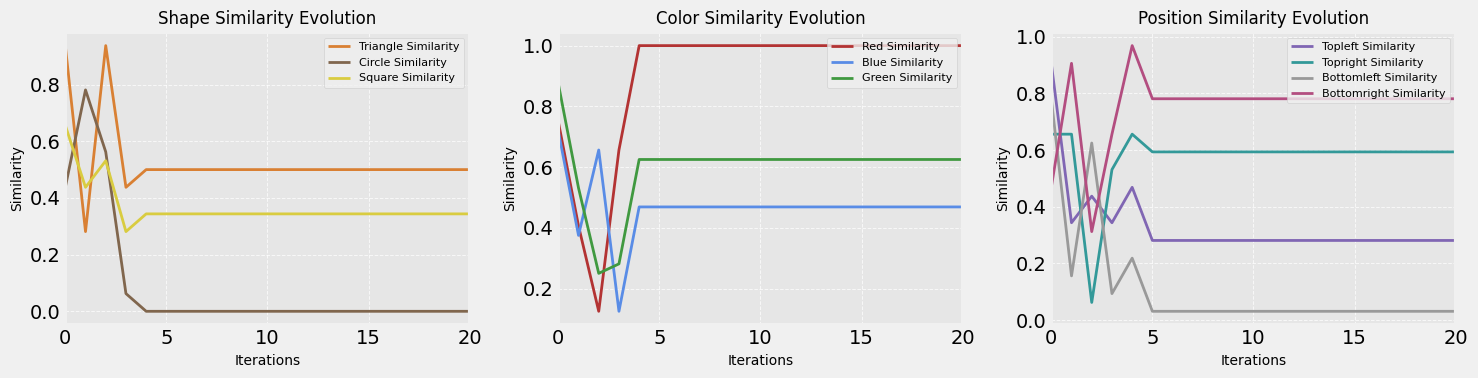

In [ ]:
#@markdown Click the ▷ button to run the simulation and view results

#@markdown Here, the visual scene you choose is processed by the HDC Resonator Network software and hardware we developed to extract its features (color, shape, and position).

%cd /content/HDCompute/
from HDComp import *
import matplotlib.gridspec as gridspec
vecSize = 32
maxIter = 100

my_dict = {
    "Square" : "square",
    "Circle" : "circle",
    "Triangle": "triangle",
    "Top Left": "topleft",
    "Top Right": "topright",
    "Bottom Left": "bottomleft",
    "Bottom Right": "bottomleft",
    "Red": "red",
    "Blue": "blue",
    "Green": "green"
}



chosen_color = my_dict[color_dropdown.value]
chosen_shape = my_dict[shape_dropdown.value]
chosen_position = my_dict[position_dropdown.value]

history = run_single_case(vecSize, maxIter, chosen_color, chosen_shape, chosen_position)

plot_graph_new(history, categories, titles, colors_dict)

## Implementation
<!-- with OpenLane targeting SKY130 -->

### RTL2GDS Flow

In [ ]:
#@markdown We need to remove the previously installed version of Verilator and also install libparse in order for OpenLane to function properly. In order for everything to run the first time in the notebook we will also need to restart the runtime. Once you click the ▷ button for this cell, at the bottom it will prompt you **Once deleted, variables cannot be recovered. Proceed (y/[n])?** Please type y
!apt remove -y verilator
!pip install libparse
%reset

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'verilator' is not installed, so not removed
The following packages were automatically installed and are no longer required:
  libsystemc libsystemc-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
#@title Install Dependencies {display-mode: "form"}
#@markdown Click the ▷ button to setup the digital design environment based on [conda-eda](https://github.com/hdl/conda-eda).

#@markdown Main components we will install

#@markdown *   Open_pdks.sky130a : a PDK installer for open-source EDA tools.
#@markdown *   Openlane : an automated RTL to GDSII flow based on several components including OpenROAD, Yosys, Magic, Netgen, CVC, SPEF-Extractor, KLayout and a number of custom scripts for design exploration and optimization.
#@markdown *   GDSTK : a C++ library for creation and manipulation of GDSII and OASIS files.

!apt remove -y verilator
#openlane_version = 'custom_set' #@param {type:"string"}
#open_pdks_version = 'custom_set' #@param {type:"string"}

#if openlane_version == 'latest':
#  openlane_version = ''
#if open_pdks_version == 'latest':
#  open_pdks_version = ''

import os
import pathlib

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={"2023.11.03_0_gf4f8dad8"} \
                     open_pdks.sky130a={"1.0.458_0_g8c68aca"} \
                     openroad={"2.0_10927_g0922eecb9"} \
                     verilator={"5.018_57_ga022b672a"}
!bin/micromamba install --quiet \
                        --yes \
                        --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        --channel main \
                        gdstk

!pip install libparse libparse
PATH = os.environ['PATH']
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
#%reset

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'verilator' is not installed, so not removed
The following packages were automatically installed and are no longer required:
  libsystemc libsystemc-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Empty environment created at prefix: /content/conda-env

Pinned packages:
  - python 3.7*


Transaction

  Prefix: /content/conda-env

  Updating specs:

   - openlane=2023.11.03_0_gf4f8dad8
   - open_pdks.sky130a=1.0.458_0_g8c68aca
   - openroad=2.0_10927_g0922eecb9
   - verilator=5.018_57_ga022b672a


  Package                                                Version  Build                 Channel         Size
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────────────────────────

In [ ]:
%%writefile config.json
{
    "DESIGN_NAME": "top",
    "VERILOG_FILES": "dir::SystolicArray/src/*.sv",
    "CLOCK_PERIOD": 40,
    "CLOCK_NET": "clk",
    "CLOCK_PORT": "clk",

    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 480 200",
    "PL_TARGET_DENSITY": 0.8
}

Overwriting config.json


### Run Flow
In the event that the flow fails due to a verilator (linter) or libparse (on step 34) error please restart runtime and rerun install dependencies. Just re-running install dependencies may work as well

In [ ]:
%env PDK=sky130A
!flow.tcl -design .

env: PDK=sky130A
OpenLane 2023.11.03_0_gf4f8dad8-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /content/runs/RUN_2024.04.15_18.01.03
[INFO]: Saving runtime environment...
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[WARNING]: PNR_SDC_FILE is not set. It is recommended to write a custom SDC file for the design. Defaulting to BASE_SDC_FILE
[WARNING]: SIGNOFF_SDC_FILE is not set. It is recommended to write a custom SDC file for the design. Defaulting to BASE_SDC_FILE
[INFO]: Running linter (Verilator) (log: 

### View GDS Results

> TODO - add explanation

<div>
<img src="https://github.com/SiliconJackets/CaC_ISSCC25_HyperDimensionalComputing/blob/main/imgs/gds.png?raw=1" width="1000"/>
</div>